/var/folders/l3/1dw53jmx4kv805sbct5w1rpw0000gn/T/ipykernel_48761/3898610554.py:80: RuntimeWarning: overflow encountered in double_scalars
  dSdt = mu * N - beta * S_TwoFactor[i-1] * I_TwoFactor[i-1] - mu * S_TwoFactor[i-1]
/var/folders/l3/1dw53jmx4kv805sbct5w1rpw0000gn/T/ipykernel_48761/3898610554.py:81: RuntimeWarning: overflow encountered in double_scalars
  dEdt = beta * S_TwoFactor[i-1] * I_TwoFactor[i-1] - etha * E_TwoFactor[i-1] - mu * E_TwoFactor[i-1]
/var/folders/l3/1dw53jmx4kv805sbct5w1rpw0000gn/T/ipykernel_48761/3898610554.py:80: RuntimeWarning: invalid value encountered in double_scalars
  dSdt = mu * N - beta * S_TwoFactor[i-1] * I_TwoFactor[i-1] - mu * S_TwoFactor[i-1]
/var/folders/l3/1dw53jmx4kv805sbct5w1rpw0000gn/T/ipykernel_48761/3898610554.py:81: RuntimeWarning: invalid value encountered in double_scalars
  dEdt = beta * S_TwoFactor[i-1] * I_TwoFactor[i-1] - etha * E_TwoFactor[i-1] - mu * E_TwoFactor[i-1]


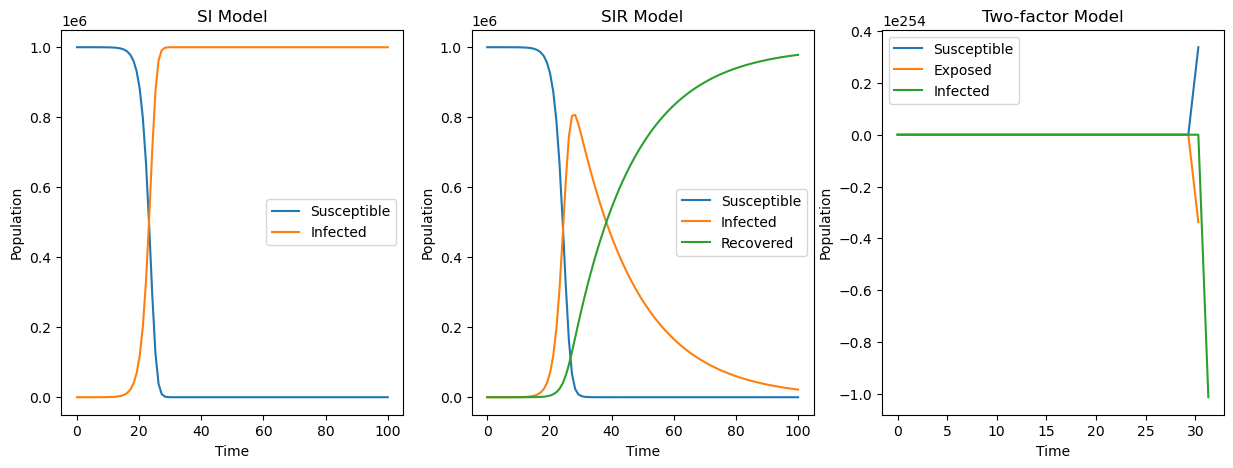

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000000
I0 = 1
etha = 3
gamma = 0.05
mu = 0.06 / N
beta = 0.8 / N

T = 100
t = np.linspace(0, T, T)


# SI Model
S_SI = np.zeros(T)
S_SI[0] = N - I0

I_SI = np.zeros(T)
I_SI[0] = I0

# SIR Model
S_SIR = np.zeros(T)
S_SIR[0] = N - I0

I_SIR = np.zeros(T)
I_SIR[0] = I0

R_SIR = np.zeros(T)
R_SIR[0] = 0

# Two-factor Model
S_TwoFactor = np.zeros(T)
S_TwoFactor[0] = N - I0

E_TwoFactor = np.zeros(T)
E_TwoFactor[0] = 0

I_TwoFactor = np.zeros(T)
I_TwoFactor[0] = I0

fig, axs = plt.subplots(1, 3, figsize=(15,5))

# SI Model
for i in range(1, T):
    dSdt = -beta * S_SI[i-1] * I_SI[i-1]
    dIdt = beta * S_SI[i-1] * I_SI[i-1]
    S_SI[i] = S_SI[i-1] + dSdt
    I_SI[i] = I_SI[i-1] + dIdt


axs[0].plot(t, S_SI, label='Susceptible')
axs[0].plot(t, I_SI, label='Infected')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Population')
axs[0].set_title('SI Model')
axs[0].legend()

# SIR Model
for i in range(1, T):
    dSdt = -beta * S_SIR[i-1] * I_SIR[i-1]
    dIdt = beta * S_SIR[i-1] * I_SIR[i-1] - gamma * I_SIR[i-1]
    dRdt = gamma * I_SIR[i-1]
    S_SIR[i] = S_SIR[i-1] + dSdt
    I_SIR[i] = I_SIR[i-1] + dIdt
    R_SIR[i] = R_SIR[i-1] + dRdt

axs[1].plot(t, S_SIR, label='Susceptible')
axs[1].plot(t, I_SIR, label='Infected')
axs[1].plot(t, R_SIR, label='Recovered')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Population')
axs[1].set_title('SIR Model')
axs[1].legend()

# Two-factor Model
for i in range(1, T):
    dSdt = mu * N - beta * S_TwoFactor[i-1] * I_TwoFactor[i-1] - mu * S_TwoFactor[i-1]
    dEdt = beta * S_TwoFactor[i-1] * I_TwoFactor[i-1] - etha * E_TwoFactor[i-1] - mu * E_TwoFactor[i-1]
    dIdt = etha * E_TwoFactor[i-1] - gamma * I_TwoFactor[i-1] - mu * I_TwoFactor[i-1]
    S_TwoFactor[i] = S_TwoFactor[i-1] + dSdt
    E_TwoFactor[i] = E_TwoFactor[i-1] + dEdt
    I_TwoFactor[i] = I_TwoFactor[i-1] + dIdt

axs[2].plot(t, S_TwoFactor, label='Susceptible')
axs[2].plot(t, E_TwoFactor, label='Exposed')
axs[2].plot(t, I_TwoFactor, label='Infected')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Population')
axs[2].set_title('Two-factor Model')
axs[2].legend()

plt.show()

